# Predictive Analysis : Wine Quality - Revo Hendriansyah

# Deskripsi Project

## Deskripsi Latar Belakang Proyek: Prediksi Kualitas Wine dengan Machine Learning
Penilaian kualitas wine secara tradisional dilakukan melalui tes sensorik oleh panelis ahli yang bersifat subjektif, memakan waktu, dan biaya tinggi. Kualitas wine sangat dipengaruhi oleh komposisi kimia seperti tingkat keasaman, kandungan gula, dan kadar alkohol, yang dapat diukur secara objektif.

Machine learning menawarkan solusi efektif untuk memprediksi kualitas wine dengan menganalisis pola kompleks dalam data kimiawi. Proyek ini bertujuan membangun model machine learning yang mampu memprediksi kualitas wine secara akurat berdasarkan parameter kimia, sehingga proses penilaian menjadi lebih cepat, objektif, dan efisien.



# Import Library

In [54]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# abaikan peringatan warning
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Abaikan peringatan khusus terkait metrik yang tidak terdefinisi
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Load Dataset

In [55]:
df = pd.read_csv('/content/WineQT.csv')
print("Ukuran data:", df.shape)
display(df.head())

Ukuran data: (1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Exploratory Data Analysis (EDA) dan Data Understanding

Exploratory Data Analysis (EDA) merupakan langkah awal yang krusial dalam memahami dataset dengan lebih mendalam. Pada tahap ini, data dianalisis untuk mengidentifikasi karakteristik utama, menemukan pola-pola yang tersembunyi, serta memeriksa asumsi-asumsi yang mungkin berlaku pada data. Proses EDA biasanya dilakukan dengan memanfaatkan teknik statistik deskriptif yang bertujuan mempermudah interpretasi dan pengambilan keputusan dalam tahapan analisis selanjutnya.

In [56]:
print(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Berdasarkan hasil snippet data dan metadata dataset Wine Quality, dapat diketahui bahwa dataset ini memiliki 13 kolom. Kolom-kolom tersebut yaitu:

1. fixed acidity: Tingkat keasaman tetap dalam wine yang berkontribusi pada rasa asam.
2. volatile acidity: Keasaman yang mudah menguap, jika tinggi dapat menyebabkan rasa tidak sedap seperti cuka.
3. citric acid: Kandungan asam sitrat yang memberikan rasa segar pada wine.
4. residual sugar: Gula tersisa setelah proses fermentasi, memengaruhi rasa manis wine.
5. chlorides: Kandungan garam klorida yang berpengaruh pada rasa asin.
6. free sulfur dioxide: Konsentrasi SO₂ bebas yang mencegah oksidasi dan pertumbuhan mikroorganisme.
7. total sulfur dioxide: Jumlah total SO₂, termasuk yang bebas dan terikat, memengaruhi rasa dan daya simpan.
8. density: Kepadatan wine, terkait dengan kadar alkohol dan gula.
9. pH: Tingkat keasaman, yang memengaruhi rasa dan kestabilan wine.
10. sulphates: Kandungan kalium sulfat yang juga berperan sebagai pengawet.
11. alcohol: Persentase kadar alkohol dalam volume wine.
12. quality: Skor penilaian kualitas wine pada skala 0 sampai 10, target prediksi.
13. Id: Nomor identifikasi unik untuk setiap sampel data.

In [57]:
df.duplicated().sum()

np.int64(0)

In [58]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Berdasarkan hasil yang ada di atas untuk pemeriksaan duplicate data dan missing value itu tidak ada yang berarti dataset ini tidak ada mengalami kesalahan pada data yang double ataupun data yang hilang

# Preprocessing: Label Biner (Good/Bad Wine)

Melakukan beberapa langkah persiapan data untuk analisis dan pemodelan:

1. Menghapus kolom Id karena kolom ini hanya berisi identifier unik yang tidak memberikan informasi relevan untuk prediksi kualitas wine.

2. Membuat kolom baru bernama quality_label yang mengubah target asli quality menjadi label biner: wine dengan kualitas 7 atau lebih dianggap sebagai wine yang “baik” (1), sedangkan yang kurang dari 7 dianggap “buruk” (0). Ini memudahkan pemodelan klasifikasi.

3. Memisahkan dataset menjadi fitur (X) yang berisi parameter kimiawi wine, dan label (y) yang merupakan hasil klasifikasi kualitas wine dalam bentuk biner.

Langkah-langkah ini bertujuan menyiapkan data agar siap digunakan dalam proses training model machine learning klasifikasi.

In [59]:
# Buang kolom Id
df = df.drop('Id', axis=1)

# Kualitas >=7 dianggap 'good' wine, lainnya 'bad'
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
print(df['quality_label'].value_counts())

# Pisahkan fitur dan label
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']


quality_label
0    984
1    159
Name: count, dtype: int64


# Scaling & Split Data


Kode ini melakukan tahap scaling dan pembagian data untuk pelatihan model machine learning:

1. Standardisasi fitur: Dengan menggunakan StandardScaler, setiap fitur pada dataset X diubah menjadi memiliki rata-rata nol dan standar deviasi satu. Proses ini penting untuk memastikan semua fitur berada pada skala yang sama agar model dapat belajar dengan lebih efektif dan stabil.

2. Membagi data menjadi set pelatihan dan pengujian: Data yang sudah distandarisasi dibagi menjadi dua bagian — 80% untuk pelatihan (X_train, y_train) dan 20% untuk pengujian (X_test, y_test). Pembagian ini dilakukan secara stratified, artinya proporsi kelas ‘good’ dan ‘bad’ pada data pelatihan dan pengujian tetap seimbang.

3. Menampilkan ukuran data pelatihan dan pengujian untuk memastikan pembagian telah berjalan sesuai rencana.

Langkah ini mempersiapkan data agar siap digunakan untuk membangun dan mengevaluasi model machine learning dengan hasil yang dapat diandalkan.

In [60]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "| Test:", X_test.shape)


Train: (914, 11) | Test: (229, 11)


# Membangun Model


Kode ini bertujuan untuk membandingkan performa beberapa model machine learning dalam memprediksi kualitas wine:

1. Mendefinisikan empat model klasifikasi yang umum digunakan, yaitu Logistic Regression, Random Forest, Support Vector Machine (SVM), dan Gradient Boosting.

2. Melakukan pelatihan (fit) masing-masing model menggunakan data pelatihan (X_train, y_train).

3. Menggunakan model yang telah dilatih untuk memprediksi label pada data uji (X_test).

4. Menghitung metrik evaluasi utama yaitu akurasi, serta membuat laporan klasifikasi yang mencakup precision, recall, dan F1-score khusus untuk kelas positif (‘good’ wine).

5. Mencetak hasil evaluasi setiap model agar dapat dilihat performanya secara langsung.

6. Menyimpan hasil metrik utama setiap model ke dalam daftar results untuk analisis atau perbandingan lebih lanjut.

Tujuan utama dari kode ini adalah untuk menemukan model terbaik yang mampu memprediksi kualitas wine dengan akurasi dan metrik evaluasi lain yang optimal.

In [61]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    print(f"\n==== {name} ====")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": report['1']['precision'],
        "Recall": report['1']['recall'],
        "F1-score": report['1']['f1-score']
    })



==== Logistic Regression ====
Accuracy: 0.8646288209606987
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       197
           1       0.52      0.34      0.42        32

    accuracy                           0.86       229
   macro avg       0.71      0.65      0.67       229
weighted avg       0.85      0.86      0.85       229


==== Random Forest ====
Accuracy: 0.9213973799126638
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       197
           1       0.79      0.59      0.68        32

    accuracy                           0.92       229
   macro avg       0.86      0.78      0.82       229
weighted avg       0.92      0.92      0.92       229


==== SVM ====
Accuracy: 0.8602620087336245
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       197
           1       0.00      0.00      0.00        32

    accuracy            

## Tabel Perbandingan Hasil Model


In [62]:
results_df = pd.DataFrame(results)
display(results_df)


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.864629,0.523810,0.34375,0.415094
1,Random Forest,0.921397,0.791667,0.59375,0.678571
2,SVM,0.860262,0.000000,0.00000,0.000000
3,Gradient Boosting,0.899563,0.666667,0.56250,0.610169


### Analisis Hasil Evaluasi Model Klasifikasi
Hasil evaluasi empat model machine learning pada data uji menunjukkan performa yang berbeda-beda dalam memprediksi kualitas wine dengan label biner (baik = 1, buruk = 0).

Dari keempat model yang diuji, Random Forest merupakan model terbaik untuk prediksi kualitas wine dalam konteks ini. Model ini mencapai akurasi tertinggi (92.1%) serta memiliki precision, recall, dan F1-score terbaik pada kelas positif (‘good’ wine), yang sangat penting agar model mampu mengenali wine berkualitas baik secara efektif.

Namun, meskipun Random Forest unggul, recall pada kelas positif masih di bawah 60%, yang berarti model masih melewatkan sebagian wine baik. Jika prioritas utama adalah meminimalkan kesalahan dalam mengidentifikasi wine berkualitas baik, maka perlu dilakukan optimasi lebih lanjut, misalnya dengan penyesuaian threshold atau teknik balancing data.

# Feature Importance


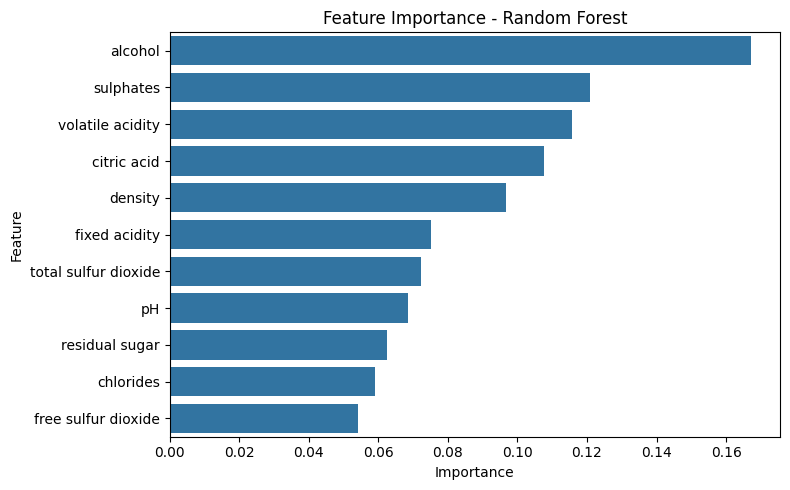

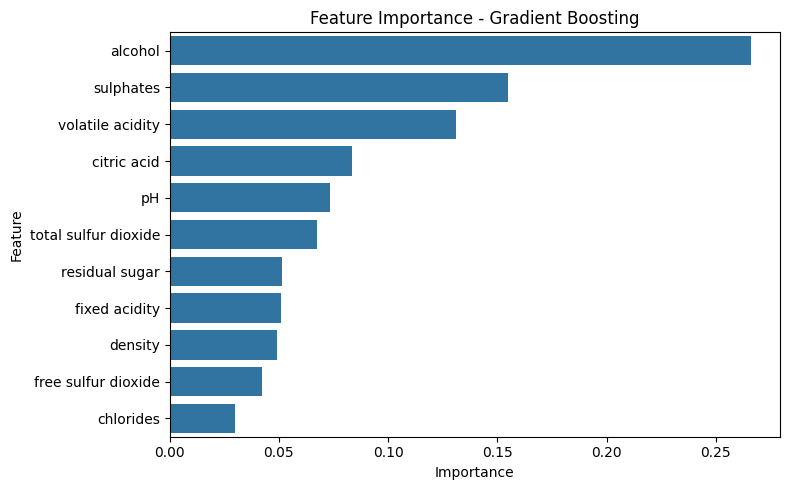

In [63]:
for name in ["Random Forest", "Gradient Boosting"]:
    model = models[name]
    importances = model.feature_importances_
    feat_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(8,5))
    sns.barplot(x='Importance', y='Feature', data=feat_df)
    plt.title(f"Feature Importance - {name}")
    plt.tight_layout()
    plt.show()


### Hasil Visualisasi Feature Importance

Visualisasikan feature importance atau tingkat pengaruh masing-masing fitur (parameter kimiawi wine) terhadap prediksi kualitas wine pada dua model terbaik, yaitu Random Forest dan Gradient Boosting.

Dengan menggunakan atribut feature_importances_ dari model, kita mendapatkan bobot kontribusi setiap fitur dalam proses pengambilan keputusan model. Fitur-fitur dengan nilai importance lebih tinggi dianggap lebih berpengaruh dalam menentukan kualitas wine.

Hasil visualisasi menunjukkan bahwa fitur alcohol dan sulphates merupakan dua parameter kimia yang paling berpengaruh terhadap prediksi kualitas wine. Hal ini mengindikasikan bahwa kadar alkohol dan kadar sulphates dalam wine memiliki peranan signifikan dalam menentukan apakah wine tersebut masuk kategori “baik” atau “buruk”.

Pengetahuan ini penting sebagai insight untuk fokus pengendalian kualitas dalam proses produksi wine, serta memperkuat interpretabilitas model machine learning yang dibangun.

## Kesimpulan

Berdasarkan hasil analisis dan pemodelan kualitas wine, dapat disimpulkan sebagai berikut:

1. Dataset yang digunakan bersih dari nilai kosong dan duplikat, sehingga layak untuk dilakukan proses pemodelan.

2. Pendekatan klasifikasi biner dengan mengelompokkan kualitas wine menjadi dua kelas (baik dan buruk) memudahkan proses prediksi dan evaluasi.

3. Model Random Forest dan Gradient Boosting menunjukkan performa terbaik dibandingkan dengan Logistic Regression dan SVM, baik dari segi akurasi maupun metrik evaluasi lain seperti presisi, recall, dan F1-score.

4. Fitur yang paling berpengaruh terhadap prediksi kualitas wine adalah alcohol, volatile acidity, dan sulphates, berdasarkan analisis feature importance pada model berbasis pohon.

Secara keseluruhan, model yang dikembangkan sudah dapat digunakan sebagai alat bantu prediksi kualitas wine dengan tingkat akurasi yang baik dan dapat mendukung pengambilan keputusan di industri wine.
